In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from scipy.interpolate import interp1d

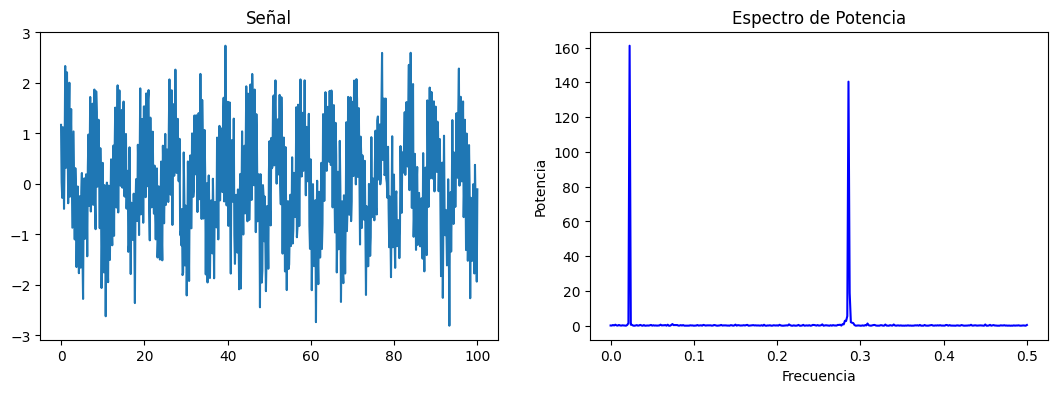

In [ ]:

N = 700  # número de muestras

# Generar señal aleatoria
x = np.linspace(0, 100, N)
y = (np.sin(x) + np.cos(4*np.pi*x)) + np.random.normal(0,0.4,N)

# Calcular la transformada rápida de Fourier de la señal
Y_freq = np.fft.rfft(y)
frequencies = np.fft.rfftfreq(N, d=1)

# Calcular el espectro de potencia
Sxx = (1 / N) * np.abs(Y_freq) ** 2

# Graficar los resultados
fig, axs = plt.subplots(1, 2, figsize=(13, 4))
axs[0].plot(x, y)
axs[0].set_title('Señal')
axs[1].plot(frequencies, Sxx, 'b')
axs[1].set_title('Espectro de Potencia')
plt.xlabel('Frecuencia')
plt.ylabel('Potencia')
plt.show()

In [ ]:
# Interpolar Sxx para tener el mismo tamaño que y
f = interp1d(frequencies, Sxx, kind='linear')
frequencies_interp = np.linspace(frequencies.min(), frequencies.max(), len(x))
Sxx_interp = f(frequencies_interp)

# Concatenar y Sxx_interp
data = np.column_stack((y, Sxx_interp))

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=42)



In [ ]:
# Definir y entrenar el modelo de TensorFlow (ejemplo)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluar el modelo
loss = model.evaluate(X_test, y_test)
print("Loss:", loss)

Epoch 1/50
18/18 [==============================] - 1s 16ms/step - loss: 1.0444 - val_loss: 0.4282
Epoch 2/50
18/18 [==============================] - 0s 5ms/step - loss: 0.4478 - val_loss: 0.2327
Epoch 3/50
18/18 [==============================] - 0s 5ms/step - loss: 0.0567 - val_loss: 0.0211
Epoch 4/50
18/18 [==============================] - 0s 6ms/step - loss: 0.0327 - val_loss: 0.0396
Epoch 5/50
18/18 [==============================] - 0s 5ms/step - loss: 0.0791 - val_loss: 0.0121
Epoch 6/50
18/18 [==============================] - 0s 5ms/step - loss: 0.0230 - val_loss: 0.0286
Epoch 7/50
18/18 [==============================] - 0s 4ms/step - loss: 0.0164 - val_loss: 0.0243
Epoch 8/50
18/18 [==============================] - 0s 5ms/step - loss: 0.1549 - val_loss: 0.0253
Epoch 9/50
18/18 [==============================] - 0s 5ms/step - loss: 1.3483 - val_loss: 0.1504
Epoch 10/50
18/18 [==============================] - 0s 4ms/step - loss: 0.0687 - val_loss: 0.0177
Epoch 11/50
18/18 

22/22 [==============================] - 0s 2ms/step


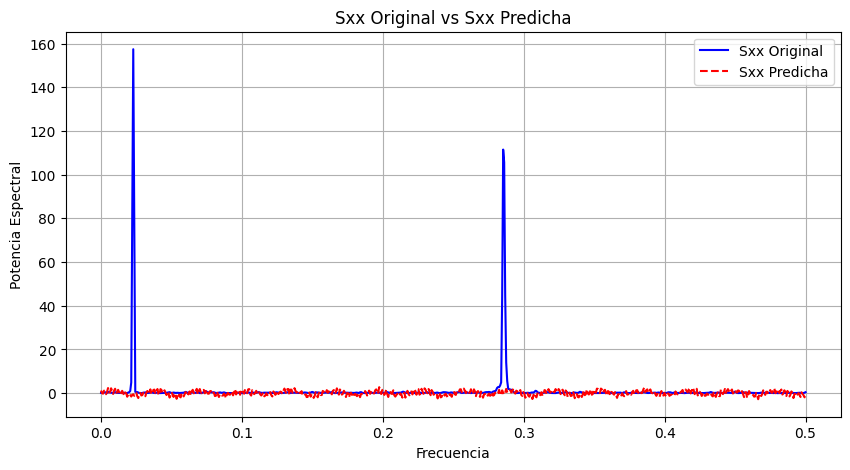

In [ ]:
# Predicción de Sxx usando el modelo
Sxx_pred = model.predict(data)

# Graficar Sxx_pred vs Sxx
plt.figure(figsize=(10, 5))
plt.plot(frequencies_interp, Sxx_interp, label='Sxx Original', color='blue')
plt.plot(frequencies_interp, Sxx_pred, label='Sxx Predicha', color='red', linestyle='--')
plt.title('Sxx Original vs Sxx Predicha')
plt.xlabel('Frecuencia')
plt.ylabel('Potencia Espectral')
plt.legend()
plt.grid(True)
plt.show()